In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [149]:
df=pd.read_csv('data1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [150]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [151]:
print('Wymiary zbioru danych są równe: {}'.format(df.shape))

Wymiary zbioru danych są równe: (569, 33)


In [152]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [153]:
y=df[['diagnosis']]
df=df.drop(columns=['Unnamed: 32','diagnosis','id'])
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:>

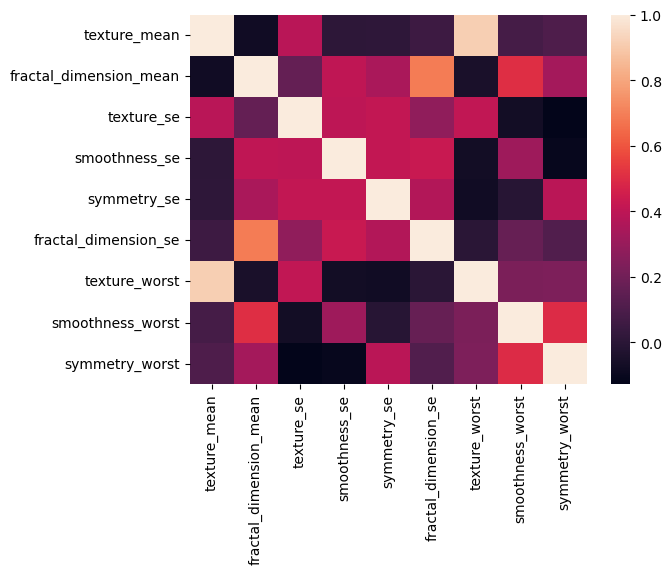

In [154]:
#usuwamy wartości których korelacja z innymi wartościami jest wysoka, zmienne o dużej koleracji wnoszą mało informacji do modelu
corr=df.corr()
a=np.array(corr.columns)
lista=a[corr.sum()>10]
corr=corr[corr.sum()<10].drop(columns=lista)
sns.heatmap(corr)

### Preprocessing

In [157]:
names=df.columns
scaler=StandardScaler()
std_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
pca=PCA()
#pca_df=pca.fit_transform(std_df)
df=std_df
#df = pca_df.set_axis(names)
corr.columns

Index(['texture_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'symmetry_worst'],
      dtype='object')

In [158]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Trenowanie modelu

In [159]:
df=df.drop(columns=lista)
X=df.values
a=pd.get_dummies(y)
y=a.drop(columns='diagnosis_M').values.reshape(y.shape[0],)

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.14,random_state=111)

In [161]:
print('Wielkość danych treningowych {} i testowych {}'.format(X_train.shape[0],X_test.shape[0]))

Wielkość danych treningowych 489 i testowych 80


In [162]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
print('Dokładność modelu wynisi: {}'.format(acc))

Dokładność modelu wynisi: 0.8875


In [163]:
X_test.shape

(80, 9)

In [164]:
X_train.shape

(489, 9)

### Dostrajanie liczby sąsiadów

In [165]:
nei=np.arange(1,101,1)
score=[]
for elem in nei:
    model=KNeighborsClassifier(n_neighbors=elem)
    model.fit(X_train,y_train)
    y_pred1=model.predict(X_test)
    score.append(accuracy_score(y_pred1,y_test))
    

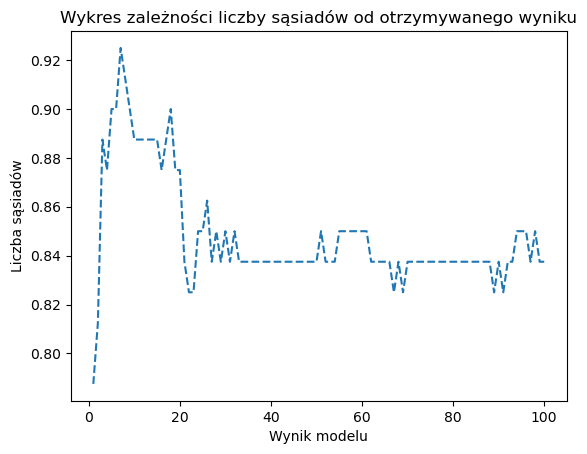

Jak widać na otrzymanym wykresie, 7 sąsiadów jest liczbą o najlepszej skuteczności modelu w wysokości: 92.5%
W ten sposób poprawiliśmy skuteczność modelu o 3.750000000000009%


In [166]:
plt.plot(nei,score,'--')
plt.ylabel('Liczba sąsiadów')
plt.xlabel('Wynik modelu')
plt.title('Wykres zależności liczby sąsiadów od otrzymywanego wyniku')
plt.show()
print('Jak widać na otrzymanym wykresie, {} sąsiadów jest liczbą o najlepszej skuteczności modelu w wysokości: {}%'.format(nei[score.index(np.array(score).max())],(100*np.array(score).max())))
print('W ten sposób poprawiliśmy skuteczność modelu o {}%'.format((100*(np.array(score).max()-acc))))

### Teraz wybierzemy inny model który może pasować lepiej, bez specyfikowania hiperparametrów

In [167]:
model=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,101,1),'leaf_size':np.array([10,20,30,40,50])}
kf=KFold(n_splits=10,shuffle=True,random_state=126)
model_cv=GridSearchCV(model,params,cv=kf)
model_cv.fit(X_train,y_train)
print('Dla modelu KNC najepsze paramertry to {}, pozwalające osiągnąć wynik o dokładności {}'.format(model_cv.best_params_,model_cv.best_score_))

Dla modelu KNC najepsze paramertry to {'leaf_size': 10, 'n_neighbors': 16}, pozwalające osiągnąć wynik o dokładności 0.8406037414965987


In [168]:
modele={'KNeighborsClassifier':KNeighborsClassifier(),'LogisticRegression':LogisticRegression(max_iter=500),'SVC':SVC(),'DecisionTreeClassifier':DecisionTreeClassifier(),'Ada':AdaBoostClassifier(),'Gradien':GradientBoostingClassifier()}

In [169]:
for name,model in modele.items():
    model=model
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('Wynik dla modelu {} wynosi: {}'.format(name,100*(accuracy_score(y_pred,y_test))))

Wynik dla modelu KNeighborsClassifier wynosi: 90.0
Wynik dla modelu LogisticRegression wynosi: 91.25
Wynik dla modelu SVC wynosi: 92.5
Wynik dla modelu DecisionTreeClassifier wynosi: 83.75
Wynik dla modelu Ada wynosi: 93.75
Wynik dla modelu Gradien wynosi: 86.25


### Wybieramy trzy najlepsze modelu aby użyć Voting Classifier, w tym przypadku: AdaBoostClassifier, GradientBoostingClassifier, LogisticRegression

In [170]:
best={'Ada':[AdaBoostClassifier(),{'n_estimators':np.arange(2,60,2)}],'Gradien':[GradientBoostingClassifier(),{'max_depth':np.arange(1,10,1),'min_samples_leaf': np.array([1,2,3,4]),'n_estimators':np.arange(10,101,10)}],'LogisticRegression':[LogisticRegression(max_iter=500),{'max_iter':np.array([10,30,50,70,90,100])}]}

In [171]:
for name,elem in best.items():
    print(name)

Ada
Gradien
LogisticRegression


In [ ]:
modele=[]
for name,elem in best.items():
    model=elem[0]
    kf=KFold(n_splits=5,shuffle=True,random_state=126)
    params=elem[1]
    model_cv=GridSearchCV(model,params,cv=kf)
    model_cv.fit(X_train,y_train)
    modele.append((name, model_cv))
    print('lol')

In [176]:
modele_score=[]
for elem in modele:
    y_pred=elem[1].predict(X_test)
    modele_score.append(accuracy_score(y_pred,y_test))
    print('Dokładność modelu {} jest równa: {}'.format(modele.index(elem)+1,accuracy_score(y_pred,y_test)))

Dokładność modelu 1 jest równa: 0.9
Dokładność modelu 2 jest równa: 0.9
Dokładność modelu 3 jest równa: 0.9125


In [ ]:
voting=VotingClassifier(estimators=modele)
voting.fit(X_train,y_train)
y_pred=voting.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

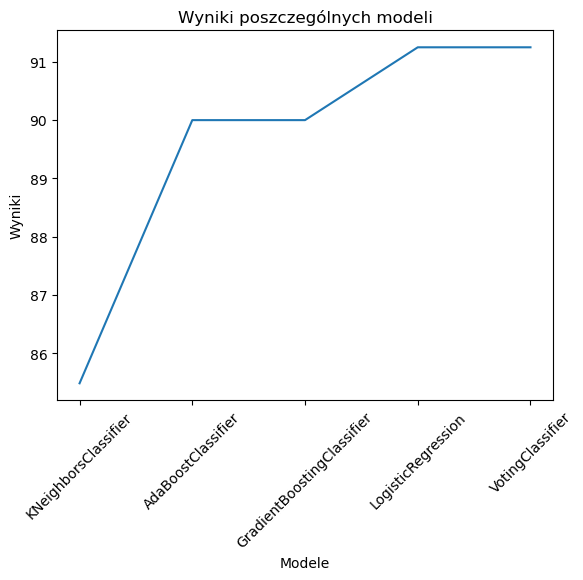

In [181]:
x=np.array(['KNeighborsClassifier','AdaBoostClassifier','GradientBoostingClassifier','LogisticRegression','VotingClassifier'])
y=np.array([model_cv.best_score_,modele_score[0],modele_score[1],modele_score[2],score])
plt.plot(x,y*100)
plt.title('Wyniki poszczególnych modeli')
plt.xlabel('Modele')
plt.ylabel('Wyniki')
plt.xticks(rotation=45)

Wnioski: 


Jak widzimy pojedyńcze nieprzetrenowane modele mają najgorsze wyniki predykcji,lepiej radzą sobie modele z ustawionymi hiperparametrami, najbardziej efektywny jednak okazał się VotingClassifier który wykorzystując wszystkie  trzy modele, z dostosowanymi hiperparametrami,dostarczył najwyższy wskaźnik skuteczności